In [5]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [6]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 1 & tutorial name: breaking-a-carbon-nanotube
figures will be saved in /docs/sphinx/source/tutorials/figures/level1/breaking-a-carbon-nanotube/


In [7]:
if os.path.exists("output_cnt_length.dat"):
    length = np.loadtxt("output_cnt_length.dat")
    time, length = length.T
    time /= 1000 # ps
    if os.path.exists("data_plot/") is False:
        os.mkdir("data_plot/")
    np.savetxt("data_plot/cnt_length.dat", np.vstack([time, length]).T)
else:
    time, length = np.loadtxt("data_plot/cnt_length.dat").T

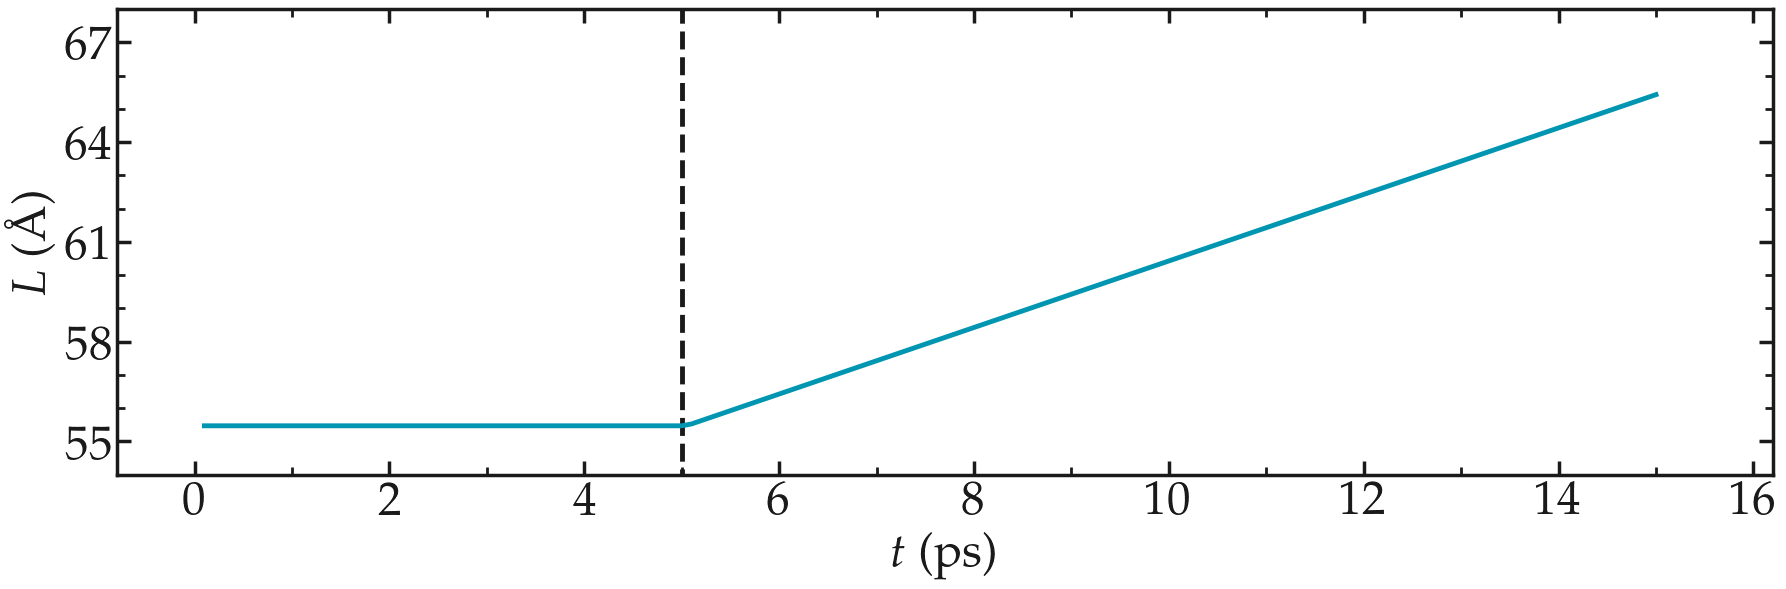

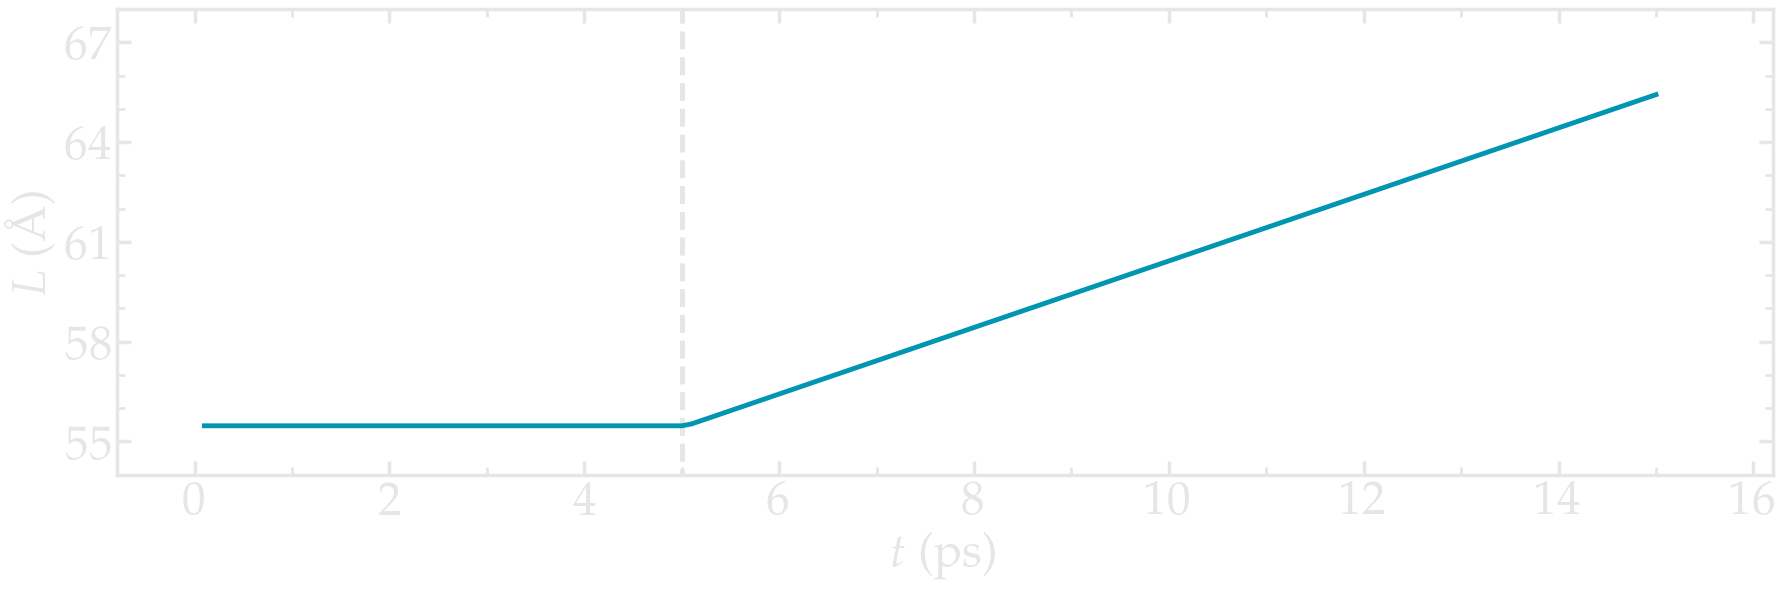

In [16]:
filename = "length-unbreakable"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    line = np.arange(50, 70, 0.1)
    ax[-1].plot(line*0+5, line, '--', color=mygray, linewidth=3.5)
    ax[-1].plot(time, length, color=colors["myblue"], linewidth=3.5)
    complete_panel(ax[-1], r'$t$ (ps)', r'$L$ (\AA)', legend=False, axis_color=mygray, locator_y=3)
    set_boundaries(plt, x_ticks=np.arange(0, 18, 2), y_ticks=np.arange(55, 68, 3),
                   x_boundaries=(-0.8, 16.2), y_boundaries=(54, 68))
    save_figure(fig, mode, git_path, path_figures, filename)